# Imports and Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
from tqdm import tqdm
import numpy as np
import os
from sklearn import preprocessing
USE_GPU = True
dtype = torch.float32 # We will be using float throughout this tutorial.

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss.
print_every = 100
print('using device:', device)

using device: cuda


In [3]:
import pandas as pd
from skimage import io

# Dataset folder setup, [ref here](https://www.kaggle.com/code/gauravduttakiit/simple-dataset-building-ai2022)

In [4]:
import glob
import shutil

done = False # guard to run this cell once
if not done : 
    newpath = r'./train' 
    if not os.path.exists(newpath):
        os.makedirs(newpath)

    def move_elements(src, dst) :  
        for jpgfile in tqdm(glob.iglob(os.path.join(src_dir, "*.jpg"))):
            shutil.copy(jpgfile, dst_dir)

    src_dir = "../input/ai2022-competition/Train_part_1/Train_part_1"
    dst_dir = "./train"
    move_elements(src_dir, dst_dir)

    src_dir = "../input/ai2022-competition/Train_part_2/Train_part_2"
    dst_dir = "./train"
    move_elements(src_dir, dst_dir)

    src_dir = "../input/ai2022-competition/Train_part_3/Train_part_3"
    dst_dir = "./train"
    move_elements(src_dir, dst_dir)

    newpath = r'./test' 
    if not os.path.exists(newpath):
        os.makedirs(newpath)

    src_dir = "../input/ai2022-competition/Test/Test"
    dst_dir = "./test"
    move_elements(src_dir, dst_dir)

0it [00:00, ?it/s]

1it [00:00,  3.05it/s]

30it [00:00, 90.03it/s]

55it [00:00, 87.93it/s]

69it [00:00, 94.55it/s]

93it [00:01, 109.16it/s]

107it [00:01, 115.55it/s]

132it [00:01, 146.47it/s]

153it [00:01, 155.82it/s]

187it [00:01, 202.93it/s]

210it [00:01, 200.37it/s]

232it [00:01, 204.32it/s]

265it [00:01, 237.35it/s]

290it [00:01, 237.57it/s]

320it [00:01, 253.05it/s]

350it [00:02, 265.53it/s]

378it [00:02, 242.45it/s]

414it [00:02, 271.82it/s]

444it [00:02, 279.53it/s]

473it [00:02, 262.31it/s]

500it [00:02, 236.93it/s]

537it [00:02, 271.37it/s]

566it [00:02, 234.85it/s]

592it [00:03, 224.97it/s]

616it [00:03, 202.59it/s]

645it [00:03, 222.23it/s]

669it [00:03, 220.13it/s]

693it [00:03, 225.12it/s]

726it [00:03, 251.91it/s]

752it [00:03, 216.45it/s]

777it [00:03, 223.80it/s]

807it [00:04, 242.34it/s]

839it [00:04, 263.45it/s]

870it [00:04, 274.53it/s]

899it [00:04, 274.57it/s]

927it [00:04, 269.44it/s]

955it [00:04, 271.69it/s]

986it [00:04, 282.40it/s]

1015it [00:04, 260.83it/s]

1046it [00:04, 274.09it/s]

1074it [00:04, 266.39it/s]

1103it [00:05, 270.88it/s]

1131it [00:05, 240.83it/s]

1156it [00:05, 229.20it/s]

1180it [00:05, 219.42it/s]

1203it [00:05, 215.66it/s]

1225it [00:05, 210.98it/s]

1247it [00:05, 166.73it/s]

1266it [00:05, 170.47it/s]

1288it [00:06, 182.18it/s]

1308it [00:06, 185.96it/s]

1328it [00:06, 186.16it/s]

1348it [00:06, 160.22it/s]

1365it [00:06, 155.75it/s]

1382it [00:06, 148.26it/s]

1404it [00:06, 165.52it/s]

1426it [00:06, 176.59it/s]

1445it [00:07, 158.93it/s]

1469it [00:07, 176.63it/s]

1489it [00:07, 182.73it/s]

1509it [00:07, 186.04it/s]

1531it [00:07, 193.89it/s]

1552it [00:07, 197.12it/s]

1573it [00:07, 200.29it/s]

1594it [00:07, 193.93it/s]

1614it [00:07, 189.88it/s]

1635it [00:08, 193.69it/s]

1655it [00:08, 176.88it/s]

1676it [00:08, 183.27it/s]

1697it [00:08, 189.77it/s]

1717it [00:08, 183.25it/s]

1740it [00:08, 193.74it/s]

1760it [00:08, 151.99it/s]

1782it [00:08, 167.73it/s]

1803it [00:09, 176.27it/s]

1822it [00:09, 157.66it/s]

1844it [00:09, 170.93it/s]

1863it [00:09, 170.37it/s]

1886it [00:09, 184.37it/s]

1908it [00:09, 192.39it/s]

1929it [00:09, 196.81it/s]

1950it [00:09, 178.62it/s]

1971it [00:09, 185.46it/s]

1991it [00:10, 178.89it/s]

2013it [00:10, 188.71it/s]

2033it [00:10, 184.77it/s]

2052it [00:10, 178.13it/s]

2073it [00:10, 186.80it/s]

2092it [00:10, 181.21it/s]

2113it [00:10, 186.50it/s]

2137it [00:10, 201.46it/s]

2158it [00:10, 199.67it/s]

2185it [00:11, 217.01it/s]

2207it [00:11, 197.56it/s]

2229it [00:11, 203.63it/s]

2250it [00:11, 199.78it/s]

2274it [00:11, 209.85it/s]

2297it [00:11, 214.73it/s]

2320it [00:11, 216.61it/s]

2342it [00:11, 153.12it/s]

2362it [00:12, 163.25it/s]

2384it [00:12, 173.10it/s]

2409it [00:12, 191.43it/s]

2431it [00:12, 197.62it/s]

2454it [00:12, 206.23it/s]

2476it [00:12, 187.66it/s]

2496it [00:12, 177.66it/s]

2515it [00:12, 178.01it/s]

2536it [00:12, 185.45it/s]

2557it [00:13, 191.19it/s]

2581it [00:13, 203.76it/s]

2602it [00:13, 194.20it/s]

2622it [00:13, 171.71it/s]

2644it [00:13, 179.31it/s]

2663it [00:13, 154.16it/s]

2686it [00:13, 170.77it/s]

2705it [00:13, 161.60it/s]

2726it [00:14, 173.00it/s]

2748it [00:14, 184.49it/s]

2769it [00:14, 189.72it/s]

2789it [00:14, 181.12it/s]

2811it [00:14, 190.31it/s]

2832it [00:14, 194.66it/s]

2852it [00:14, 191.78it/s]

2872it [00:14, 171.85it/s]

2892it [00:14, 177.71it/s]

2911it [00:14, 177.48it/s]

2934it [00:15, 190.45it/s]

2954it [00:15, 190.32it/s]

2974it [00:15, 192.93it/s]

2995it [00:15, 190.63it/s]

3015it [00:15, 168.92it/s]

3033it [00:15, 162.53it/s]

3050it [00:15, 160.68it/s]

3073it [00:15, 174.51it/s]

3096it [00:16, 187.83it/s]

3120it [00:16, 199.10it/s]

3143it [00:16, 206.71it/s]

3166it [00:16, 211.55it/s]

3188it [00:16, 188.82it/s]

3210it [00:16, 195.73it/s]

3232it [00:16, 200.41it/s]

3253it [00:16, 200.73it/s]

3274it [00:16, 188.59it/s]

3296it [00:17, 197.08it/s]

3317it [00:17, 179.92it/s]

3340it [00:17, 192.39it/s]

3360it [00:17, 194.04it/s]

3380it [00:17, 189.47it/s]

3400it [00:17, 181.09it/s]

3419it [00:17, 181.78it/s]

3440it [00:17, 188.55it/s]

3460it [00:17, 186.98it/s]

3481it [00:18, 190.67it/s]

3501it [00:18, 189.26it/s]

3521it [00:18, 191.58it/s]

3541it [00:18, 188.77it/s]

3563it [00:18, 196.58it/s]

3584it [00:18, 200.15it/s]

3605it [00:18, 189.71it/s]

3625it [00:18, 165.58it/s]

3645it [00:18, 173.53it/s]

3666it [00:19, 181.64it/s]

3685it [00:19, 183.12it/s]

3704it [00:19, 161.91it/s]

3722it [00:19, 165.63it/s]

3741it [00:19, 171.77it/s]

3759it [00:19, 172.34it/s]

3778it [00:19, 175.86it/s]

3796it [00:19, 174.32it/s]

3814it [00:19, 160.96it/s]

3835it [00:20, 170.90it/s]

3853it [00:20, 167.87it/s]

3874it [00:20, 178.52it/s]

3893it [00:20, 181.60it/s]

3912it [00:20, 164.53it/s]

3929it [00:20, 165.45it/s]

3947it [00:20, 167.70it/s]

3965it [00:20, 169.50it/s]

3986it [00:20, 179.77it/s]

4006it [00:20, 184.12it/s]

4028it [00:21, 192.11it/s]

4048it [00:21, 190.62it/s]

4068it [00:21, 174.89it/s]

4087it [00:21, 177.53it/s]

4107it [00:21, 181.46it/s]

4126it [00:21, 146.66it/s]

4142it [00:21, 142.15it/s]

4156it [00:21, 189.45it/s]

0it [00:00, ?it/s]

1it [00:00,  2.75it/s]

16it [00:00, 44.06it/s]

34it [00:00, 82.77it/s]

47it [00:00, 81.44it/s]

75it [00:00, 132.75it/s]

93it [00:00, 142.99it/s]

119it [00:01, 174.40it/s]

139it [00:01, 137.47it/s]

170it [00:01, 176.79it/s]

198it [00:01, 201.86it/s]

229it [00:01, 229.86it/s]

255it [00:01, 224.91it/s]

282it [00:01, 235.48it/s]

307it [00:01, 180.20it/s]

329it [00:02, 186.66it/s]

356it [00:02, 206.11it/s]

390it [00:02, 239.50it/s]

416it [00:02, 225.11it/s]

441it [00:02, 231.08it/s]

468it [00:02, 238.87it/s]

497it [00:02, 251.09it/s]

523it [00:02, 224.26it/s]

547it [00:02, 227.06it/s]

571it [00:03, 225.27it/s]

594it [00:03, 193.24it/s]

615it [00:03, 167.04it/s]

641it [00:03, 187.49it/s]

665it [00:03, 199.38it/s]

687it [00:03, 202.45it/s]

715it [00:03, 223.26it/s]

743it [00:03, 238.99it/s]

771it [00:04, 244.79it/s]

796it [00:04, 230.55it/s]

827it [00:04, 252.29it/s]

853it [00:04, 253.26it/s]

884it [00:04, 268.69it/s]

912it [00:04, 232.70it/s]

941it [00:04, 245.93it/s]

967it [00:04, 236.49it/s]

992it [00:04, 239.64it/s]

1020it [00:05, 248.88it/s]

1048it [00:05, 257.18it/s]

1079it [00:05, 271.63it/s]

1107it [00:05, 261.16it/s]

1134it [00:05, 257.44it/s]

1160it [00:05, 253.89it/s]

1186it [00:05, 237.99it/s]

1211it [00:05, 192.52it/s]

1234it [00:06, 199.52it/s]

1256it [00:06, 180.31it/s]

1278it [00:06, 189.44it/s]

1298it [00:06, 187.73it/s]

1318it [00:06, 179.40it/s]

1340it [00:06, 188.76it/s]

1360it [00:06, 185.32it/s]

1382it [00:06, 194.36it/s]

1402it [00:06, 195.35it/s]

1422it [00:07, 186.26it/s]

1441it [00:07, 173.33it/s]

1461it [00:07, 179.06it/s]

1482it [00:07, 184.75it/s]

1501it [00:07, 165.78it/s]

1519it [00:07, 168.38it/s]

1537it [00:07, 147.78it/s]

1558it [00:07, 162.24it/s]

1575it [00:08, 163.84it/s]

1599it [00:08, 182.84it/s]

1618it [00:08, 176.35it/s]

1638it [00:08, 179.46it/s]

1657it [00:08, 179.00it/s]

1676it [00:08, 172.03it/s]

1697it [00:08, 179.63it/s]

1719it [00:08, 190.85it/s]

1742it [00:08, 200.01it/s]

1763it [00:08, 199.54it/s]

1784it [00:09, 192.99it/s]

1805it [00:09, 197.68it/s]

1826it [00:09, 200.56it/s]

1847it [00:09, 154.39it/s]

1866it [00:09, 161.97it/s]

1884it [00:09, 160.29it/s]

1904it [00:09, 169.58it/s]

1922it [00:10, 133.67it/s]

1938it [00:10, 139.32it/s]

1957it [00:10, 151.54it/s]

1974it [00:10, 152.69it/s]

1993it [00:10, 151.80it/s]

2009it [00:10, 138.94it/s]

2031it [00:10, 159.35it/s]

2054it [00:10, 176.89it/s]

2075it [00:10, 181.52it/s]

2096it [00:11, 186.13it/s]

2118it [00:11, 195.18it/s]

2140it [00:11, 199.95it/s]

2162it [00:11, 203.99it/s]

2183it [00:11, 200.90it/s]

2205it [00:11, 204.36it/s]

2226it [00:11, 203.26it/s]

2250it [00:11, 211.95it/s]

2272it [00:11, 155.80it/s]

2292it [00:12, 165.21it/s]

2314it [00:12, 177.49it/s]

2334it [00:12, 179.37it/s]

2353it [00:12, 173.69it/s]

2372it [00:12, 176.55it/s]

2393it [00:12, 183.37it/s]

2412it [00:12, 183.79it/s]

2434it [00:12, 192.29it/s]

2454it [00:12, 193.39it/s]

2474it [00:13, 184.48it/s]

2493it [00:13, 180.95it/s]

2512it [00:13, 159.34it/s]

2531it [00:13, 165.99it/s]

2551it [00:13, 174.99it/s]

2569it [00:13, 167.26it/s]

2593it [00:13, 185.17it/s]

2613it [00:13, 187.56it/s]

2633it [00:13, 187.04it/s]

2652it [00:14, 186.10it/s]

2674it [00:14, 194.68it/s]

2697it [00:14, 203.53it/s]

2718it [00:14, 196.26it/s]

2739it [00:14, 199.78it/s]

2762it [00:14, 207.47it/s]

2783it [00:14, 205.78it/s]

2805it [00:14, 209.41it/s]

2826it [00:14, 208.70it/s]

2847it [00:14, 207.39it/s]

2869it [00:15, 208.50it/s]

2890it [00:15, 207.01it/s]

2912it [00:15, 198.91it/s]

2932it [00:15, 162.14it/s]

2950it [00:15, 132.80it/s]

2971it [00:15, 149.77it/s]

2992it [00:15, 162.97it/s]

3014it [00:16, 176.12it/s]

3033it [00:16, 178.95it/s]

3052it [00:16, 180.82it/s]

3075it [00:16, 193.66it/s]

3095it [00:16, 192.37it/s]

3116it [00:16, 197.37it/s]

3137it [00:16, 172.11it/s]

3159it [00:16, 183.10it/s]

3182it [00:16, 193.73it/s]

3203it [00:16, 194.99it/s]

3223it [00:17, 191.80it/s]

3246it [00:17, 201.05it/s]

3267it [00:17, 186.33it/s]

3286it [00:17, 187.12it/s]

3306it [00:17, 189.27it/s]

3327it [00:17, 195.00it/s]

3347it [00:17, 165.58it/s]

3365it [00:17, 167.84it/s]

3386it [00:18, 174.17it/s]

3404it [00:18, 153.37it/s]

3424it [00:18, 163.50it/s]

3447it [00:18, 180.48it/s]

3468it [00:18, 187.58it/s]

3489it [00:18, 192.77it/s]

3509it [00:18, 192.74it/s]

3529it [00:18, 173.91it/s]

3552it [00:18, 186.22it/s]

3573it [00:19, 190.75it/s]

3595it [00:19, 198.23it/s]

3616it [00:19, 200.17it/s]

3637it [00:19, 202.31it/s]

3661it [00:19, 211.48it/s]

3684it [00:19, 216.65it/s]

3706it [00:19, 205.05it/s]

3728it [00:19, 207.74it/s]

3749it [00:19, 191.57it/s]

3770it [00:19, 193.29it/s]

3790it [00:20, 190.69it/s]

3810it [00:20, 153.19it/s]

3828it [00:20, 149.32it/s]

3850it [00:20, 160.18it/s]

3867it [00:20, 115.88it/s]

3888it [00:20, 134.32it/s]

3905it [00:21, 135.09it/s]

3926it [00:21, 151.55it/s]

3948it [00:21, 167.86it/s]

3968it [00:21, 174.92it/s]

3987it [00:21, 152.59it/s]

4004it [00:21, 151.78it/s]

4024it [00:21, 151.49it/s]

4043it [00:21, 159.20it/s]

4062it [00:21, 166.33it/s]

4083it [00:22, 177.47it/s]

4106it [00:22, 191.47it/s]

4128it [00:22, 198.98it/s]

4149it [00:22, 167.55it/s]

4167it [00:22, 168.58it/s]

4185it [00:22, 160.52it/s]

4204it [00:22, 166.67it/s]

4223it [00:22, 169.98it/s]

4241it [00:22, 167.79it/s]

4252it [00:23, 184.55it/s]

0it [00:00, ?it/s]

1it [00:00,  2.65it/s]

29it [00:00, 78.70it/s]

61it [00:00, 145.69it/s]

89it [00:00, 182.98it/s]

114it [00:00, 199.67it/s]

145it [00:00, 230.63it/s]

172it [00:01, 233.65it/s]

198it [00:01, 240.77it/s]

233it [00:01, 239.43it/s]

260it [00:01, 246.62it/s]

286it [00:01, 249.18it/s]

312it [00:01, 242.49it/s]

344it [00:01, 263.11it/s]

376it [00:01, 278.23it/s]

409it [00:01, 291.94it/s]

441it [00:01, 298.75it/s]

475it [00:02, 308.31it/s]

507it [00:02, 302.52it/s]

538it [00:02, 296.13it/s]

572it [00:02, 308.15it/s]

603it [00:02, 290.35it/s]

633it [00:02, 209.43it/s]

658it [00:02, 190.10it/s]

681it [00:03, 164.04it/s]

703it [00:03, 166.08it/s]

725it [00:03, 176.42it/s]

748it [00:03, 187.92it/s]

775it [00:03, 207.65it/s]

798it [00:03, 204.63it/s]

822it [00:03, 202.75it/s]

843it [00:03, 196.13it/s]

870it [00:04, 211.23it/s]

898it [00:04, 228.51it/s]

922it [00:04, 221.23it/s]

947it [00:04, 227.60it/s]

974it [00:04, 236.95it/s]

998it [00:04, 176.40it/s]

1020it [00:04, 185.41it/s]

1043it [00:04, 196.34it/s]

1066it [00:04, 202.43it/s]

1089it [00:05, 209.37it/s]

1115it [00:05, 221.88it/s]

1138it [00:05, 204.96it/s]

1160it [00:05, 159.15it/s]

1178it [00:05, 158.03it/s]

1196it [00:05, 159.45it/s]

1214it [00:05, 160.75it/s]

1232it [00:05, 163.58it/s]

1249it [00:06, 155.08it/s]

1267it [00:06, 160.54it/s]

1284it [00:06, 135.21it/s]

1299it [00:06, 121.37it/s]

1312it [00:06, 104.08it/s]

1329it [00:06, 118.45it/s]

1351it [00:06, 140.26it/s]

1371it [00:07, 153.51it/s]

1391it [00:07, 164.49it/s]

1411it [00:07, 173.24it/s]

1431it [00:07, 180.41it/s]

1453it [00:07, 188.82it/s]

1473it [00:07, 166.30it/s]

1494it [00:07, 176.37it/s]

1513it [00:07, 167.56it/s]

1533it [00:07, 174.48it/s]

1551it [00:08, 157.99it/s]

1568it [00:08, 121.43it/s]

1582it [00:08, 121.28it/s]

1600it [00:08, 134.48it/s]

1615it [00:08, 136.84it/s]

1637it [00:08, 157.37it/s]

1654it [00:08, 154.91it/s]

1672it [00:08, 161.53it/s]

1689it [00:09, 161.56it/s]

1706it [00:09, 153.93it/s]

1722it [00:09, 150.16it/s]

1738it [00:09, 140.59it/s]

1755it [00:09, 147.56it/s]

1773it [00:09, 142.05it/s]

1788it [00:09, 143.01it/s]

1805it [00:09, 150.13it/s]

1824it [00:09, 159.46it/s]

1841it [00:10, 113.50it/s]

1858it [00:10, 125.86it/s]

1876it [00:10, 138.26it/s]

1892it [00:10, 143.11it/s]

1910it [00:10, 151.23it/s]

1930it [00:10, 160.35it/s]

1949it [00:10, 167.03it/s]

1967it [00:10, 167.42it/s]

1985it [00:11, 150.18it/s]

2002it [00:11, 154.40it/s]

2022it [00:11, 166.30it/s]

2040it [00:11, 144.53it/s]

2056it [00:11, 132.07it/s]

2075it [00:11, 145.92it/s]

2092it [00:11, 150.70it/s]

2110it [00:11, 156.52it/s]

2127it [00:12, 144.01it/s]

2146it [00:12, 154.06it/s]

2163it [00:12, 158.13it/s]

2180it [00:12, 132.40it/s]

2195it [00:12, 132.56it/s]

2215it [00:12, 148.48it/s]

2237it [00:12, 167.19it/s]

2255it [00:12, 168.26it/s]

2275it [00:12, 175.12it/s]

2294it [00:13, 165.08it/s]

2313it [00:13, 169.62it/s]

2331it [00:13, 163.34it/s]

2353it [00:13, 176.75it/s]

2371it [00:13, 175.91it/s]

2393it [00:13, 187.60it/s]

2415it [00:13, 194.56it/s]

2437it [00:13, 201.12it/s]

2458it [00:13, 200.09it/s]

2480it [00:14, 204.71it/s]

2501it [00:14, 191.68it/s]

2521it [00:14, 180.25it/s]

2544it [00:14, 190.85it/s]

2564it [00:14, 190.05it/s]

2584it [00:14, 185.67it/s]

2603it [00:14, 145.61it/s]

2620it [00:14, 151.32it/s]

2641it [00:15, 165.39it/s]

2659it [00:15, 126.87it/s]

2678it [00:15, 140.29it/s]

2702it [00:15, 162.72it/s]

2721it [00:15, 166.08it/s]

2742it [00:15, 177.53it/s]

2761it [00:15, 172.23it/s]

2779it [00:15, 169.75it/s]

2797it [00:15, 171.61it/s]

2823it [00:16, 194.90it/s]

2845it [00:16, 200.52it/s]

2866it [00:16, 198.30it/s]

2887it [00:16, 197.26it/s]

2907it [00:16, 191.67it/s]

2930it [00:16, 200.81it/s]

2953it [00:16, 207.90it/s]

2974it [00:16, 208.06it/s]

2995it [00:16, 199.41it/s]

3016it [00:17, 199.98it/s]

3037it [00:17, 194.12it/s]

3057it [00:17, 171.40it/s]

3078it [00:17, 180.52it/s]

3098it [00:17, 182.48it/s]

3117it [00:17, 182.80it/s]

3136it [00:17, 176.64it/s]

3161it [00:17, 195.37it/s]

3182it [00:17, 197.44it/s]

3203it [00:18, 172.85it/s]

3222it [00:18, 177.04it/s]

3241it [00:18, 169.18it/s]

3259it [00:18, 151.64it/s]

3279it [00:18, 163.27it/s]

3298it [00:18, 169.57it/s]

3316it [00:18, 122.29it/s]

3337it [00:19, 140.94it/s]

3359it [00:19, 158.62it/s]

3382it [00:19, 174.00it/s]

3402it [00:19, 171.36it/s]

3421it [00:19, 167.36it/s]

3441it [00:19, 174.61it/s]

3462it [00:19, 183.18it/s]

3481it [00:19, 183.43it/s]

3501it [00:19, 187.35it/s]

3521it [00:20, 177.89it/s]

3542it [00:20, 185.10it/s]

3564it [00:20, 193.68it/s]

3584it [00:20, 187.06it/s]

3603it [00:20, 185.11it/s]

3625it [00:20, 156.80it/s]

3648it [00:20, 173.66it/s]

3669it [00:20, 181.20it/s]

3689it [00:20, 185.65it/s]

3709it [00:21, 177.55it/s]

3731it [00:21, 187.90it/s]

3752it [00:21, 193.45it/s]

3776it [00:21, 204.93it/s]

3799it [00:21, 211.16it/s]

3822it [00:21, 215.08it/s]

3844it [00:21, 205.20it/s]

3865it [00:21, 197.97it/s]

3887it [00:21, 203.14it/s]

3909it [00:22, 207.19it/s]

3930it [00:22, 190.12it/s]

3951it [00:22, 195.17it/s]

3971it [00:22, 130.93it/s]

3988it [00:22, 138.51it/s]

4005it [00:22, 123.12it/s]

4026it [00:22, 141.59it/s]

4043it [00:23, 143.98it/s]

4059it [00:23, 132.65it/s]

4081it [00:23, 153.13it/s]

4102it [00:23, 167.56it/s]

4124it [00:23, 180.66it/s]

4143it [00:23, 181.00it/s]

4162it [00:23, 175.13it/s]

4181it [00:23, 165.40it/s]

4205it [00:23, 183.72it/s]

4228it [00:24, 194.46it/s]

4249it [00:24, 198.38it/s]

4270it [00:24, 144.56it/s]

4282it [00:24, 175.18it/s]

0it [00:00, ?it/s]

1it [00:00,  3.68it/s]

33it [00:00, 111.59it/s]

56it [00:00, 149.26it/s]

77it [00:00, 157.28it/s]

112it [00:00, 213.40it/s]

137it [00:00, 216.22it/s]

167it [00:00, 239.84it/s]

197it [00:01, 254.23it/s]

224it [00:01, 253.62it/s]

252it [00:01, 258.93it/s]

283it [00:01, 273.11it/s]

311it [00:01, 250.29it/s]

337it [00:01, 249.00it/s]

372it [00:01, 276.57it/s]

401it [00:01, 265.50it/s]

430it [00:01, 271.67it/s]

458it [00:02, 212.65it/s]

485it [00:02, 225.97it/s]

514it [00:02, 240.72it/s]

540it [00:02, 193.12it/s]

571it [00:02, 217.72it/s]

596it [00:02, 216.70it/s]

628it [00:02, 241.85it/s]

657it [00:02, 252.62it/s]

689it [00:03, 269.96it/s]

724it [00:03, 289.47it/s]

755it [00:03, 294.80it/s]

786it [00:03, 278.44it/s]

815it [00:03, 279.19it/s]

847it [00:03, 285.01it/s]

878it [00:03, 269.59it/s]

909it [00:03, 279.45it/s]

938it [00:03, 261.98it/s]

965it [00:04, 245.76it/s]

991it [00:04, 248.68it/s]

1024it [00:04, 269.97it/s]

1053it [00:04, 274.29it/s]

1081it [00:04, 254.62it/s]

1111it [00:04, 266.98it/s]

1139it [00:04, 240.25it/s]

1164it [00:04, 240.18it/s]

1189it [00:04, 228.43it/s]

1214it [00:05, 232.91it/s]

1238it [00:05, 221.68it/s]

1261it [00:05, 206.15it/s]

1282it [00:05, 191.02it/s]

1302it [00:05, 191.56it/s]

1322it [00:05, 189.72it/s]

1342it [00:05, 186.57it/s]

1365it [00:05, 194.68it/s]

1387it [00:05, 201.20it/s]

1408it [00:06, 202.68it/s]

1429it [00:06, 160.76it/s]

1450it [00:06, 171.69it/s]

1471it [00:06, 180.87it/s]

1491it [00:06, 179.19it/s]

1515it [00:06, 191.69it/s]

1535it [00:06, 152.63it/s]

1552it [00:07, 140.41it/s]

1568it [00:07, 128.57it/s]

1582it [00:07, 119.67it/s]

1604it [00:07, 141.99it/s]

1620it [00:07, 144.21it/s]

1639it [00:07, 155.27it/s]

1656it [00:07, 146.32it/s]

1672it [00:08, 107.74it/s]

1689it [00:08, 120.19it/s]

1713it [00:08, 147.15it/s]

1739it [00:08, 172.84it/s]

1763it [00:08, 189.14it/s]

1784it [00:08, 174.11it/s]

1809it [00:08, 192.35it/s]

1833it [00:08, 202.57it/s]

1855it [00:08, 201.59it/s]

1876it [00:09, 169.63it/s]

1899it [00:09, 183.16it/s]

1923it [00:09, 196.18it/s]

1948it [00:09, 209.34it/s]

1970it [00:09, 210.30it/s]

1992it [00:09, 187.18it/s]

2015it [00:09, 196.18it/s]

2036it [00:09, 196.90it/s]

2057it [00:09, 197.38it/s]

2080it [00:10, 204.67it/s]

2101it [00:10, 205.91it/s]

2123it [00:10, 207.38it/s]

2144it [00:10, 207.79it/s]

2165it [00:10, 167.57it/s]

2184it [00:10, 144.30it/s]

2208it [00:10, 139.25it/s]

2223it [00:11, 135.88it/s]

2249it [00:11, 162.24it/s]

2271it [00:11, 174.67it/s]

2291it [00:11, 180.19it/s]

2315it [00:11, 195.23it/s]

2336it [00:11, 193.28it/s]

2356it [00:11, 182.61it/s]

2379it [00:11, 194.69it/s]

2399it [00:11, 188.05it/s]

2421it [00:12, 193.98it/s]

2445it [00:12, 205.21it/s]

2466it [00:12, 200.57it/s]

2487it [00:12, 183.83it/s]

2506it [00:12, 174.75it/s]

2531it [00:12, 193.92it/s]

2553it [00:12, 201.00it/s]

2578it [00:12, 213.48it/s]

2600it [00:12, 214.14it/s]

2622it [00:13, 199.66it/s]

2643it [00:13, 182.06it/s]

2668it [00:13, 198.61it/s]

2692it [00:13, 206.93it/s]

2714it [00:13, 196.30it/s]

2735it [00:13, 192.12it/s]

2755it [00:13, 178.14it/s]

2779it [00:13, 191.73it/s]

2799it [00:13, 182.40it/s]

2824it [00:14, 184.40it/s]

2849it [00:14, 201.17it/s]

2872it [00:14, 207.61it/s]

2894it [00:14, 205.35it/s]

2916it [00:14, 186.85it/s]

2936it [00:14, 184.26it/s]

2961it [00:14, 200.22it/s]

2984it [00:14, 202.20it/s]

3005it [00:15, 135.67it/s]

3029it [00:15, 157.05it/s]

3053it [00:15, 175.77it/s]

3076it [00:15, 186.77it/s]

3098it [00:15, 194.60it/s]

3120it [00:15, 176.91it/s]

3145it [00:15, 194.21it/s]

3166it [00:15, 196.40it/s]

3187it [00:16, 199.78it/s]

3211it [00:16, 210.84it/s]

3234it [00:16, 215.29it/s]

3257it [00:16, 216.25it/s]

3280it [00:16, 218.18it/s]

3303it [00:16, 217.39it/s]

3327it [00:16, 220.82it/s]

3350it [00:16, 156.71it/s]

3378it [00:17, 183.60it/s]

3404it [00:17, 201.50it/s]

3427it [00:17, 172.91it/s]

3453it [00:17, 192.48it/s]

3475it [00:17, 195.41it/s]

3497it [00:17, 185.25it/s]

3522it [00:17, 200.83it/s]

3544it [00:17, 186.92it/s]

3564it [00:17, 183.24it/s]

3583it [00:18, 183.47it/s]

3609it [00:18, 202.62it/s]

3630it [00:18, 188.93it/s]

3656it [00:18, 207.47it/s]

3678it [00:18, 181.54it/s]

3698it [00:18, 180.03it/s]

3720it [00:18, 189.94it/s]

3746it [00:18, 207.84it/s]

3770it [00:19, 211.57it/s]

3796it [00:19, 223.15it/s]

3821it [00:19, 229.87it/s]

3847it [00:19, 233.47it/s]

3872it [00:19, 235.94it/s]

3896it [00:19, 231.40it/s]

3920it [00:19, 226.50it/s]

3944it [00:19, 227.46it/s]

3967it [00:19, 210.63it/s]

3992it [00:19, 221.02it/s]

4015it [00:20, 211.16it/s]

4040it [00:20, 220.48it/s]

4065it [00:20, 223.69it/s]

4088it [00:20, 211.96it/s]

4110it [00:20, 204.61it/s]

4131it [00:20, 193.01it/s]

4156it [00:20, 206.92it/s]

4177it [00:20, 205.38it/s]

4199it [00:20, 207.87it/s]

4221it [00:21, 209.31it/s]

4232it [00:21, 200.11it/s]

# Vizualising data

In [5]:
df = pd.read_csv('../input/ai2022-competition/train.csv')
num_classes = len(df.PoseLabel.unique())
num_classes

80

# Loading data

In [6]:
class ToRGB(object):
    """Convert GrayScale Image to RGB."""

    def __call__(self, image):
        if image.size()[0] == 1 : # grayscale
            image = image.repeat(3, 1, 1)
        return image

In [7]:
class YogaDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None, test=False):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.csv = pd.read_csv(csv_file)
        
        # Label encoding 
        self.le = None
        if not test :
            self.le = preprocessing.LabelEncoder()
            self.le.fit(self.csv.PoseLabel)
            self.csv.PoseLabel = self.le.transform(self.csv.PoseLabel)
            
        self.root_dir = root_dir
        self.transform = transform
        self.test = test

    def __len__(self):
        return len(self.csv)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = os.path.join(self.root_dir,
                                self.csv.iloc[idx, 0])
        image = io.imread(img_name)
        
        label = None
        if not self.test :
            label = self.csv.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        
        return image, label

In [8]:
train_dataset = YogaDataset(csv_file='../input/ai2022-competition/train.csv',
                        root_dir='./train/',
                          transform = T.Compose([  
                                T.ToPILImage(),
                                T.Resize((256,256)),
                                T.ToTensor(),
                                ToRGB(),
                                T.Normalize((0.6770, 0.6560, 0.6287),(0.3162, 0.3162, 0.3330)) # Values from code below
                          ]))

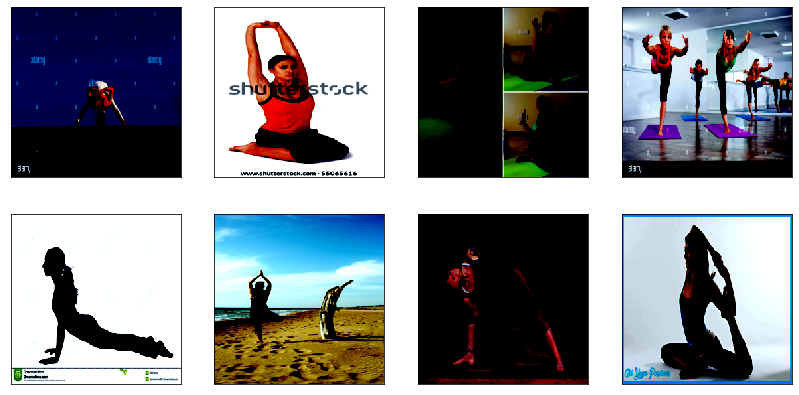

In [9]:
train_loader = DataLoader(train_dataset,
                              batch_size=16,
                              shuffle=False,
                              num_workers=0)

for images, labels in train_loader:
    fig = plt.figure(figsize = (14, 7))
    for i in range(8):
        ax = fig.add_subplot(2, 4, i + 1, xticks = [], yticks = [])     
        plt.imshow(images[i].numpy().transpose(1, 2, 0))
    break

# Mean and std

In [10]:
if False : # Already done, cf Normalization step
    # placeholders
    psum    = torch.tensor([0.0, 0.0, 0.0])
    psum_sq = torch.tensor([0.0, 0.0, 0.0])

    # loop through images
    for image, label in tqdm(train_loader):
        psum    += image.sum(axis        = [0, 2, 3])
        psum_sq += (image ** 2).sum(axis = [0, 2, 3])

    count = len(train_dataset) * 256 * 256

    # mean and std
    total_mean = psum / count
    total_var  = (psum_sq / count) - (total_mean ** 2)
    total_std  = torch.sqrt(total_var)

    # output
    print('mean: '  + str(total_mean))
    print('std:  '  + str(total_std))

# Model definiton : VGG16

In [11]:
class Flatten(nn.Module):
    def forward(self, x):
        N = x.shape[0] # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

class VGG16(nn.Module):
  def __init__(self):
        super(VGG16, self).__init__()
        self.internal_model = nn.Sequential(

        nn.Conv2d(3, 64, 3, padding='same'),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(64, 64, 3, padding='same'),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(64, 128, 3, padding='same'),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.Conv2d(128, 128, 3, padding='same'),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(128, 256, 3, padding='same'),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(256, 256, 3, padding='same'),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(256, 256, 3, padding='same'),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(256, 512, 3, padding='same'),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(512, 512, 3, padding='same'),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(512, 512, 3, padding='same'),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(512, 512, 3, padding='same'),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(512, 512, 3, padding='same'),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.Conv2d(512, 512, 3, padding='same'),
        nn.BatchNorm2d(512),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),

        Flatten(),
        nn.Dropout(),
        nn.Linear(8*8*512, 512), 
        nn.BatchNorm1d(512),
        nn.Linear(512, num_classes)
      )
        
  def forward(self, x):
    return self.internal_model(x)

In [12]:
learning_rate = 1e-2
vgg16 = VGG16()
optimizer = optim.SGD(vgg16.parameters(), lr=learning_rate,
                     momentum=0.9, nesterov=True)

In [13]:
def train_model(model, optimizer, epochs=1):
    """   
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for x, y in tqdm(train_loader):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            loss = F.cross_entropy(scores, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        check_accuracy_part34(loader_val, model)
        print()

In [ ]:
train_model(vgg16, optimizer)